<a href="https://colab.research.google.com/github/AmrFathyAhmed/soft_computing_12_project/blob/main/v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from scipy import stats
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from google.colab import drive

SEED = 30


In [ ]:

# Load the dataset
data = pd.read_csv('/content/Ames_Housing_Data.csv')

median_price = data['SalePrice'].median()
data['Label'] = (data['SalePrice'] > median_price).astype(int)

print(data['SalePrice'].value_counts())


SalePrice
135000    34
140000    33
130000    29
155000    28
145000    26
          ..
97900      1
117250     1
164990     1
163990     1
173900     1
Name: count, Length: 1032, dtype: int64


In [ ]:
print(data.columns)

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [ ]:
# Display the first few rows of the dataset
data.head()


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Label
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,1
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,0
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,1
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,1
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,1


In [ ]:
data.dtypes

,0
PID,int64
MS SubClass,int64
MS Zoning,object
Lot Frontage,float64
Lot Area,int64
...,...
Yr Sold,int64
Sale Type,object
Sale Condition,object
SalePrice,int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

**Preprocessing**


In [ ]:
# Fill missing numerical values
data.fillna(data.median(numeric_only=True), inplace=True)

# Encode categorical variables
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

# Drop SalePrice column
if 'SalePrice' in data.columns:
    data = data.drop('SalePrice', axis=1)

classes = {0: 'Below Median Price', 1: 'Above Median Price'}

X = data.drop('Label', axis=1)
y = data['Label']

print("Features shape:", X.shape)
print("Target distribution:\n", y.value_counts())

# Drop rows with missing values (just in case)
data.dropna(inplace=True)

Features shape: (2930, 80)
Target distribution:
 Label
0    1467
1    1463
Name: count, dtype: int64


In [ ]:
# total null elements

data.isnull().sum()[data.isnull().sum() > 0]

,0


In [ ]:
# Drop rows with missing values
data.dropna(inplace=True)



In [ ]:

# Feature importance (optional, can keep or remove)
point_biserial_coefs = []
for i in range(X.shape[1]):
    coef = stats.pointbiserialr(X.iloc[:, i], y)[0]
    point_biserial_coefs.append(coef)
mutual_inf = mutual_info_classif(X, y)

In [ ]:

feature_importance = pd.DataFrame({'Mutual Inf': mutual_inf, 'Point-BiSerial': point_biserial_coefs}, index=X.columns)
sorted_feature_importance = feature_importance.sort_values(by='Point-BiSerial', ascending=False)
print(sorted_feature_importance)

               Mutual Inf  Point-BiSerial
Overall Qual     0.305745        0.674081
Full Bath        0.225336        0.611337
Year Built       0.282695        0.591459
Garage Cars      0.221224        0.579992
Gr Liv Area      0.255808        0.565414
...                   ...             ...
Garage Type      0.171319       -0.483142
Kitchen Qual     0.173270       -0.490980
Exter Qual       0.212916       -0.494223
Bsmt Qual        0.203661       -0.537920
Garage Finish    0.185186       -0.567507

[80 rows x 2 columns]


In [ ]:
feature_importance.sort_values(by = 'Mutual Inf', ascending = False)


,Mutual Inf,Point-BiSerial
PID,0.441630,-0.210707
Overall Qual,0.305745,0.674081
Neighborhood,0.290193,0.079843
Year Built,0.282695,0.591459
Gr Liv Area,0.255808,0.565414
...,...,...
Roof Style,0.000000,0.077697
Kitchen AbvGr,0.000000,-0.143227
Pool Area,0.000000,0.036094
Yr Sold,0.000000,-0.013699


In [ ]:
# Drop some highly correlated or unwanted features
X.drop(['Roof Style', 'Kitchen AbvGr', 'Pool Area','Yr Sold','Mo Sold'], axis=1, inplace=True)
print(X.columns)

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage

In [ ]:
# Split data
SEED = 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=SEED)
print('train samples ->', X_train.shape)
print('test samples ->', X_test.shape)

train samples -> (2197, 77)
test samples -> (733, 77)


In [ ]:
# Scale features
MM = MinMaxScaler()
MM_fit = MM.fit(X_train)
X_train = MM_fit.transform(X_train)
X_test = MM_fit.transform(X_test)


In [ ]:
# Initialize and train Random Forest model
model = RandomForestClassifier(random_state=SEED, n_estimators=100)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=30)

In [ ]:
# Predictions and evaluation
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
print('Mean Squared Error : {0:.5f}'.format(mse))
print('Accuracy Score : {0:.2f} %'.format(acc * 100))
print(classification_report(y_test, pred, target_names=list(classes.values())))

Mean Squared Error : 0.06139
Accuracy Score : 93.86 %
                    precision    recall  f1-score   support

Below Median Price       0.93      0.95      0.94       364
Above Median Price       0.95      0.92      0.94       369

          accuracy                           0.94       733
         macro avg       0.94      0.94      0.94       733
      weighted avg       0.94      0.94      0.94       733



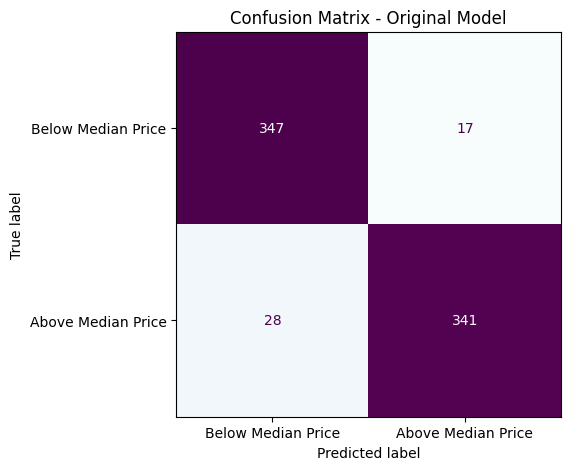

In [ ]:
cm = confusion_matrix(y_test, pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(classes.values()))
fig, ax = plt.subplots(figsize=(5, 5))
cmd.plot(ax=ax, cmap='BuPu', colorbar=False)
plt.title("Confusion Matrix - Original Model")
plt.show()

In [ ]:
# GA parameters
size = 100
n_feat = X_train.shape[1]
n_parents = 50
mutation_rate = 0.1
n_gen = 100

In [ ]:
def initialization_of_population(size, n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat, dtype=bool)
        chromosome[:int(0.3 * n_feat)] = False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population


In [ ]:
def fitness_score(population):
    scores = []
    for chromosome in population:
        rf_model = RandomForestClassifier(random_state=SEED, n_estimators=100)
        rf_model.fit(X_train[:, chromosome], y_train)
        predictions = rf_model.predict(X_test[:, chromosome])
        scores.append(accuracy_score(y_test, predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds, :][::-1])


In [ ]:
def selection(pop_after_fit, n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


In [ ]:
def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel.copy()
    for i in range(0, len(pop_after_sel), 2):
        if i + 1 < len(pop_after_sel):
            child_1, child_2 = pop_nextgen[i], pop_nextgen[i + 1]
            new_par = np.concatenate((child_1[:len(child_1) // 2], child_2[len(child_1) // 2:]))
            pop_nextgen.append(new_par)
    return pop_nextgen

In [ ]:
def mutation(pop_after_cross, mutation_rate, n_feat):
    mutation_range = int(mutation_rate * n_feat)
    pop_next_gen = []
    for n in range(len(pop_after_cross)):
        chromo = pop_after_cross[n].copy()
        rand_posi = []
        for _ in range(mutation_range):
            pos = np.random.randint(0, n_feat)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen

In [ ]:
def generations(size, n_feat, n_parents, mutation_rate, n_gen, X_train, X_test, y_train, y_test):
    best_chromo = []
    best_score = []
    population_nextgen = initialization_of_population(size, n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation', i + 1, ':', scores[0])
        pop_after_sel = selection(pop_after_fit, n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross, mutation_rate, n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo, best_score

In [ ]:
best_chromo, best_score = generations(size, n_feat, n_parents, mutation_rate, n_gen,
                                      X_train, X_test, y_train, y_test)


Best score in generation 1 : 0.9454297407912687
Best score in generation 2 : 0.9427012278308322
Best score in generation 3 : 0.9440654843110505
Best score in generation 4 : 0.9413369713506139
Best score in generation 5 : 0.946793997271487
Best score in generation 6 : 0.9440654843110505
Best score in generation 7 : 0.9508867667121419
Best score in generation 8 : 0.9440654843110505
Best score in generation 9 : 0.9481582537517054
Best score in generation 10 : 0.946793997271487
Best score in generation 11 : 0.946793997271487
Best score in generation 12 : 0.9495225102319236
Best score in generation 13 : 0.9440654843110505
Best score in generation 14 : 0.9440654843110505
Best score in generation 15 : 0.9481582537517054
Best score in generation 16 : 0.946793997271487
Best score in generation 17 : 0.9427012278308322
Best score in generation 18 : 0.9440654843110505
Best score in generation 19 : 0.946793997271487
Best score in generation 20 : 0.9522510231923602
Best score in generation 21 : 0.94

In [ ]:
best_chromosome = best_chromo[-1]
selected_features = X.columns[best_chromosome]

print("Best features selected by GA:")
print(selected_features)

Best features selected by GA:
Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Alley',
       'Lot Shape', 'Utilities', 'Condition 1', 'Bldg Type', 'House Style',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Matl',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Cond',
       'BsmtFin Type 2', 'Total Bsmt SF', 'Central Air', 'Electrical',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Fireplace Qu', 'Garage Finish', 'Garage Area',
       'Garage Qual', '3Ssn Porch', 'Pool QC', 'Fence', 'Misc Feature',
       'Misc Val', 'Yr Sold', 'Sale Condition'],
      dtype='object')


In [ ]:
X_train_ga = X_train[:, best_chromosome]
X_test_ga = X_test[:, best_chromosome]

model_ga = RandomForestClassifier(random_state=SEED, n_estimators=100)
model_ga.fit(X_train_ga, y_train)

RandomForestClassifier(random_state=30)

In [ ]:
pred_ga = model_ga.predict(X_test_ga)
acc_ga = accuracy_score(y_test, pred_ga)

print('Accuracy Score using selected features by GA: {0:.2f} %'.format(acc_ga * 100))
print(classification_report(y_test, pred_ga, target_names=list(classes.values())))

Accuracy Score using selected features by GA: 94.68 %
                    precision    recall  f1-score   support

Below Median Price       0.94      0.95      0.95       364
Above Median Price       0.95      0.94      0.95       369

          accuracy                           0.95       733
         macro avg       0.95      0.95      0.95       733
      weighted avg       0.95      0.95      0.95       733



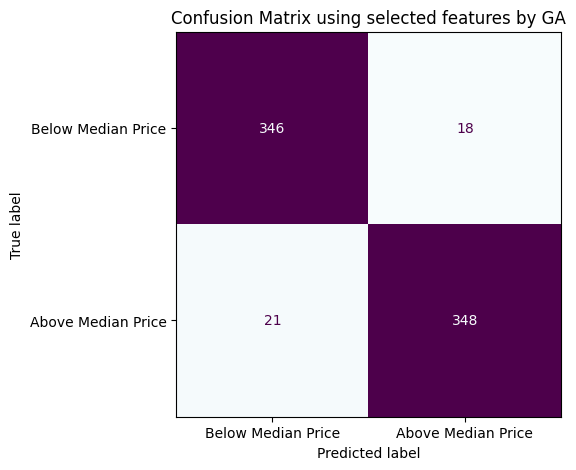

In [ ]:
cm_ga = confusion_matrix(y_test, pred_ga)
cmd_ga = ConfusionMatrixDisplay(cm_ga, display_labels=list(classes.values()))
fig, ax = plt.subplots(figsize=(5, 5))
cmd_ga.plot(ax=ax, cmap='BuPu', colorbar=False)
plt.title("Confusion Matrix using selected features by GA")
plt.show()

Iteration 1/50, Best Accuracy: 0.9468
Iteration 2/50, Best Accuracy: 0.9468
Iteration 3/50, Best Accuracy: 0.9468
Iteration 4/50, Best Accuracy: 0.9468
Iteration 5/50, Best Accuracy: 0.9468
Iteration 6/50, Best Accuracy: 0.9468
Iteration 7/50, Best Accuracy: 0.9468
Iteration 8/50, Best Accuracy: 0.9482
Iteration 9/50, Best Accuracy: 0.9482
Iteration 10/50, Best Accuracy: 0.9482
Iteration 11/50, Best Accuracy: 0.9482
Iteration 12/50, Best Accuracy: 0.9495
Iteration 13/50, Best Accuracy: 0.9495
Iteration 14/50, Best Accuracy: 0.9495
Iteration 15/50, Best Accuracy: 0.9495
Iteration 16/50, Best Accuracy: 0.9495
Iteration 17/50, Best Accuracy: 0.9495
Iteration 18/50, Best Accuracy: 0.9495
Iteration 19/50, Best Accuracy: 0.9495
Iteration 20/50, Best Accuracy: 0.9495
Iteration 21/50, Best Accuracy: 0.9495
Iteration 22/50, Best Accuracy: 0.9495
Iteration 23/50, Best Accuracy: 0.9495
Iteration 24/50, Best Accuracy: 0.9495
Iteration 25/50, Best Accuracy: 0.9495
Iteration 26/50, Best Accuracy: 0.

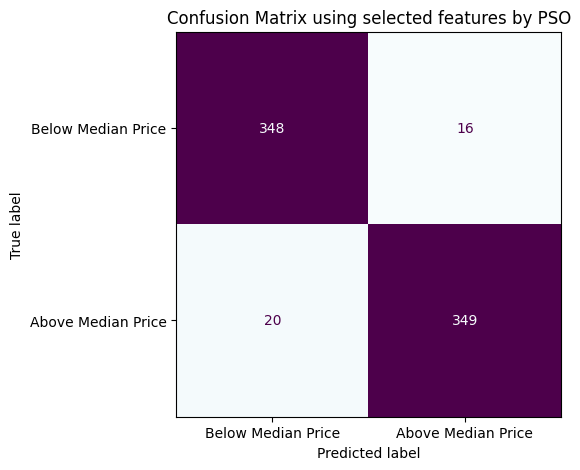

In [ ]:

# PSO parameters
n_particles = 30
n_iterations = 50
n_features = X_train.shape[1]

w = 0.5
c1 = 1.5
c2 = 1.5

np.random.seed(SEED)

particles = np.random.rand(n_particles, n_features)
velocities = np.random.rand(n_particles, n_features)

personal_best_positions = particles.copy()
personal_best_scores = np.zeros(n_particles)

for i in range(n_particles):
    selected = particles[i] > 0.5
    if np.sum(selected) == 0:
        personal_best_scores[i] = 0
    else:
        rf_model = RandomForestClassifier(random_state=SEED, n_estimators=100)
        rf_model.fit(X_train[:, selected], y_train)
        preds = rf_model.predict(X_test[:, selected])
        personal_best_scores[i] = accuracy_score(y_test, preds)

global_best_idx = np.argmax(personal_best_scores)
global_best_position = personal_best_positions[global_best_idx].copy()

for iteration in range(n_iterations):
    for i in range(n_particles):
        r1 = np.random.rand(n_features)
        r2 = np.random.rand(n_features)

        velocities[i] = (
            w * velocities[i]
            + c1 * r1 * (personal_best_positions[i] - particles[i])
            + c2 * r2 * (global_best_position - particles[i])
        )

        particles[i] += velocities[i]
        particles[i] = np.clip(particles[i], 0, 1)

        selected = particles[i] > 0.5
        if np.sum(selected) == 0:
            score = 0
        else:
            rf_model = RandomForestClassifier(random_state=SEED, n_estimators=100)
            rf_model.fit(X_train[:, selected], y_train)
            preds = rf_model.predict(X_test[:, selected])
            score = accuracy_score(y_test, preds)

        if score > personal_best_scores[i]:
            personal_best_scores[i] = score
            personal_best_positions[i] = particles[i].copy()

    global_best_idx = np.argmax(personal_best_scores)
    global_best_position = personal_best_positions[global_best_idx].copy()

    print(f"Iteration {iteration + 1}/{n_iterations}, Best Accuracy: {personal_best_scores[global_best_idx]:.4f}")

best_features_mask = global_best_position > 0.5
selected_features_pso = X.columns[best_features_mask]

print("Best features selected by PSO:")
print(selected_features_pso)

X_train_pso = X_train[:, best_features_mask]
X_test_pso = X_test[:, best_features_mask]

final_model = RandomForestClassifier(random_state=SEED, n_estimators=100)
final_model.fit(X_train_pso, y_train)

pred_pso = final_model.predict(X_test_pso)
acc_pso = accuracy_score(y_test, pred_pso)

print("Accuracy using PSO-selected features: {:.2f}%".format(acc_pso * 100))
print(classification_report(y_test, pred_pso, target_names=list(classes.values())))

cm_pso = confusion_matrix(y_test, pred_pso)
cmd_pso = ConfusionMatrixDisplay(cm_pso, display_labels=list(classes.values()))
fig, ax = plt.subplots(figsize=(5, 5))
cmd_pso.plot(ax=ax, cmap='BuPu', colorbar=False)
plt.title("Confusion Matrix using selected features by PSO")
plt.show()

In [ ]:

def compare_all(acc_base, report_base, acc_ga, report_ga, acc_pso, report_pso):
    print("Accuracy Scores:")
    print(f"Original : {acc_base * 100:.2f}%")
    print(f"GA       : {acc_ga * 100:.2f}%")
    print(f"PSO      : {acc_pso * 100:.2f}%\n")

    print("Classification Reports:\n")
    print("Original:")
    print(report_base)
    print("GA:")
    print(report_ga)
    print("PSO:")
    print(report_pso)

acc_base = accuracy_score(y_test, pred)
report_base = classification_report(y_test, pred)



In [ ]:
from sklearn.metrics import classification_report, accuracy_score

acc_base = accuracy_score(y_test, pred)
report_base = classification_report(y_test, pred)

acc_ga = accuracy_score(y_test, pred_ga)
report_ga = classification_report(y_test, pred_ga)

acc_pso = accuracy_score(y_test, pred_pso)
report_pso = classification_report(y_test, pred_pso)

compare_all(acc_base, report_base, acc_ga, report_ga, acc_pso, report_pso)


Accuracy Scores:
Original : 93.86%
GA       : 94.68%
PSO      : 95.09%

Classification Reports:

Original:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       364
           1       0.95      0.92      0.94       369

    accuracy                           0.94       733
   macro avg       0.94      0.94      0.94       733
weighted avg       0.94      0.94      0.94       733

GA:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       364
           1       0.95      0.94      0.95       369

    accuracy                           0.95       733
   macro avg       0.95      0.95      0.95       733
weighted avg       0.95      0.95      0.95       733

PSO:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       364
           1       0.96      0.95      0.95       369

    accuracy                           0.95       733
   macro avg

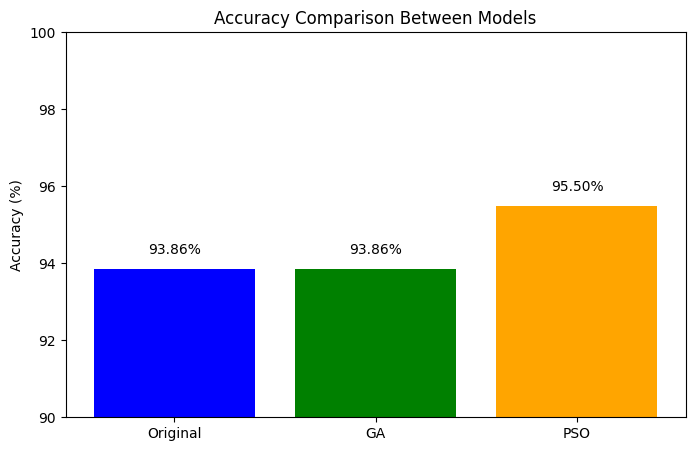

In [ ]:
import matplotlib.pyplot as plt

# قيم الدقة (Accuracy) من نتايجك
acc_base = 0.9386
acc_ga = 0.9386
acc_pso = 0.9550

def plot_accuracy_comparison(acc_base, acc_ga, acc_pso):
    models = ['Original', 'GA', 'PSO']
    accuracies = [acc_base * 100, acc_ga * 100, acc_pso * 100]  # نحولها للنسبة المئوية

    plt.figure(figsize=(8,5))
    bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange'])

    plt.ylim(90, 100)  # نحدد المحور الصادي عشان يوضح الفروق كويس
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy Comparison Between Models')

    # نكتب القيمة فوق كل بار
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval:.2f}%', ha='center', va='bottom')

    plt.show()

plot_accuracy_comparison(acc_base, acc_ga, acc_pso)
